In [ ]:
#hide
%load_ext autoreload
%autoreload 2

# Welcome to NumbaSOM

> A fast Self-Organizing Map Python library implemented in Numba.

This is a **fast and simple to use** SOM library. It utilizes online training (one data point at the time) rather than batch training. The implemented topologies are a simple 2D lattice or a torus.

## How to Install

The installation is available at PyPI. Simply type:

`pip install numbasom`

## How to use

A **Self-Organizing Map** is often used to show the underlying structure in data. To show how to use the library, we will train it on 200 random 3-dimensional vectors (so we can render them as colors):

In [ ]:
import numpy as np
from numbasom import SOM

#### Create 200 random colors

In [ ]:
data = np.random.random([200,3])

#### Initialize the library

We initalize a large map with 20 rows and 40 columns. The default topology is a 2D lattice. We can also train it on a torus by setting `is_torus=True`

In [ ]:
som = SOM(som_size=(50,100), is_torus=False)

#### Train the SOM

We will adapt the lattice by iterating 1000 times through our data points. If we set `ìs_scaled=False`, data will be normalized before training. 

In [ ]:
lattice = som.train(data, num_iterations=10000, is_scaled=True)

SOM training took: 0.343299 seconds.


#### We can display a number of lattice cells to make sure they are 3-dimensional vectors

In [ ]:
lattice[1::6,1]

array([[0.84320274, 0.30492829, 0.41450252],
       [0.74273113, 0.24442997, 0.46775752],
       [0.7079431 , 0.18936966, 0.3849527 ],
       [0.67390875, 0.13944585, 0.1926078 ],
       [0.511751  , 0.04086609, 0.17727931],
       [0.40736032, 0.21150301, 0.0357543 ],
       [0.35872757, 0.28562641, 0.0832515 ],
       [0.16635622, 0.08152816, 0.38226892],
       [0.05055562, 0.05010728, 0.34043282]])

The shape of the lattice is (20, 40, 3) as expected

In [ ]:
lattice.shape

(50, 100, 3)

#### Visualizing the lattice

Since our lattice is made of 3-dimensional vectors, we can represent it as a lattice of colors.

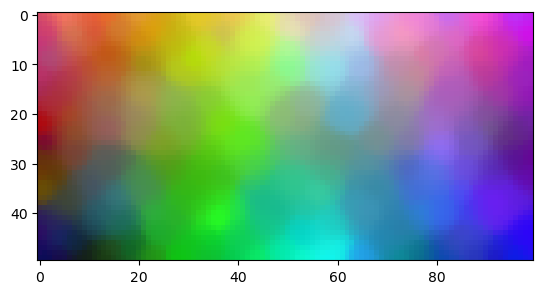

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(lattice)
plt.show()

#### Compute U-matrix

Since the most of the data will not be 3-dimensional, we can use the U-matrix (unified distance matrix by Alfred Ultsch) to visualise the map and the clusters emerging on it. 

In [ ]:
from numbasom import u_matrix

um = u_matrix(lattice)

In [ ]:
um.shape

(50, 100)

#### Plot U-matrix

The library contains a function `plot_u_matrix` that can help visualise it.

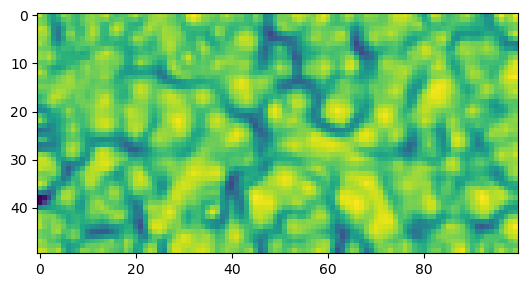

In [ ]:
from numbasom import plot_u_matrix

plot_u_matrix(um, fig_size=(6.2,6.2))